<a href="https://colab.research.google.com/github/xenidegracia/DataVizClassNotes/blob/main/Themes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INFO 526
Fall 2024 - Exploring Themes in ggplot

#Setup

In [1]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Exploring Themes in mtcars data

In [2]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [3]:
mtcars2 <- within(mtcars, {
  vs <- factor(vs, labels = c("V-shaped", "Straight"))
  am <- factor(am, labels = c("Automatic", "Manual"))
  cyl  <- factor(cyl)
  gear <- factor(gear)
})
head(mtcars2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,V-shaped,Manual,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,V-shaped,Manual,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,Straight,Manual,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,Straight,Automatic,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,V-shaped,Automatic,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,Straight,Automatic,3,1


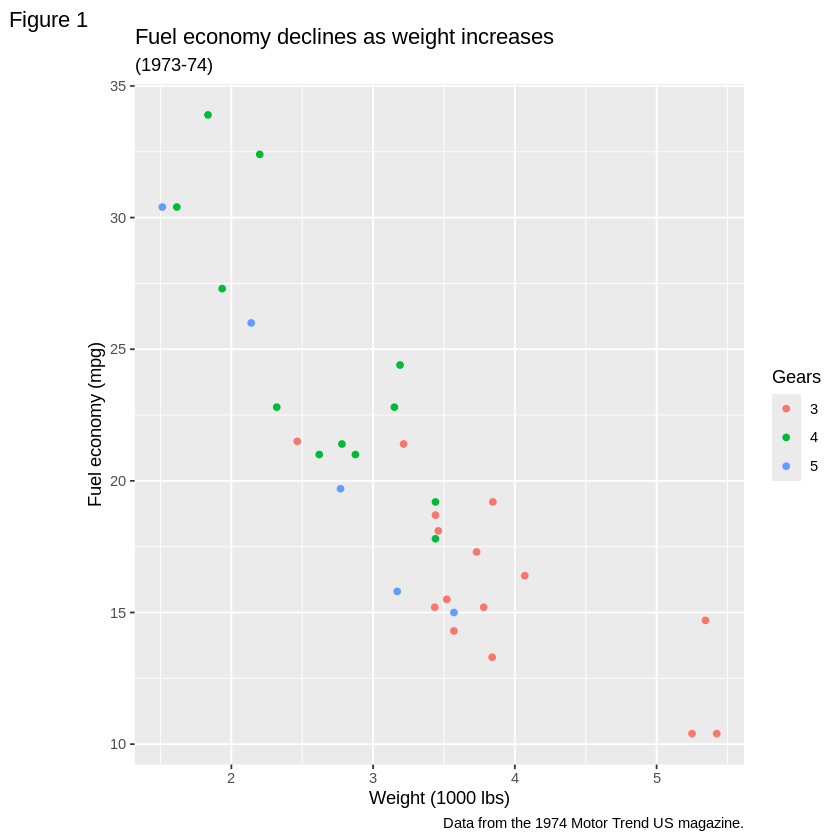

In [4]:
p1 <- ggplot(mtcars2) +
  geom_point(aes(x = wt, y = mpg, colour = gear)) +
  labs(
    title = "Fuel economy declines as weight increases",
    subtitle = "(1973-74)",
    caption = "Data from the 1974 Motor Trend US magazine.",
    tag = "Figure 1",
    x = "Weight (1000 lbs)",
    y = "Fuel economy (mpg)",
    colour = "Gears"
  )

p1 + theme_gray() #default

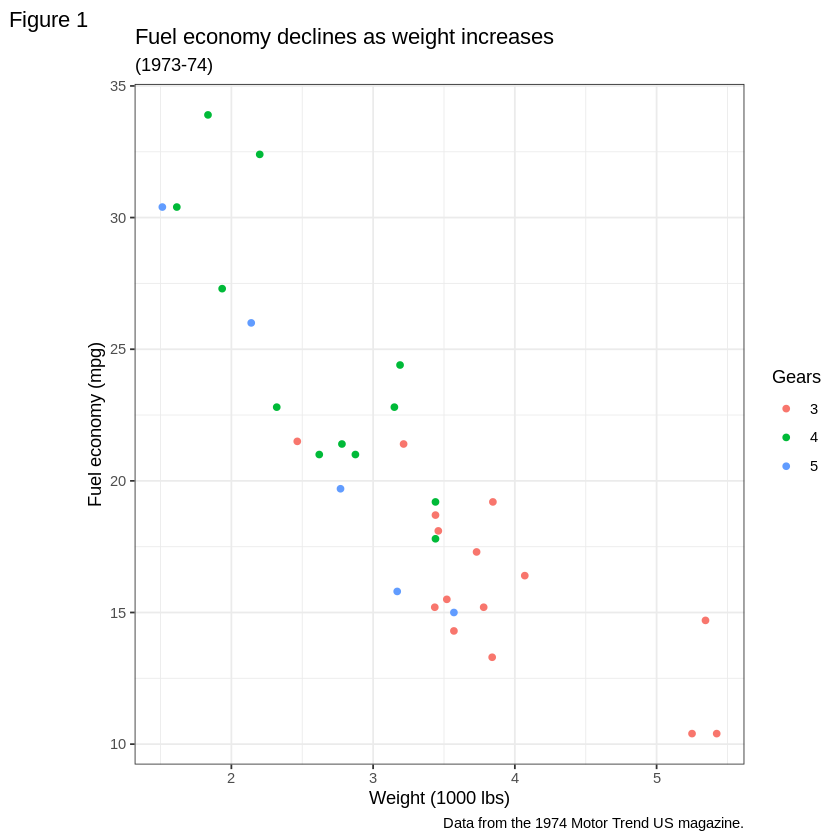

In [5]:
p1 + theme_bw()

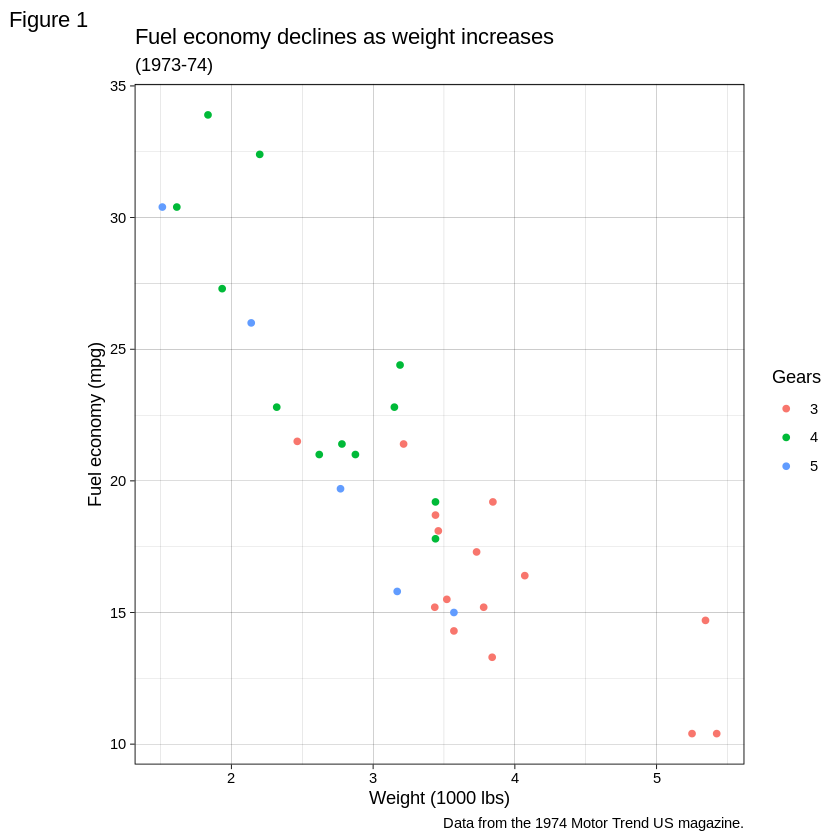

In [6]:
p1 + theme_linedraw()

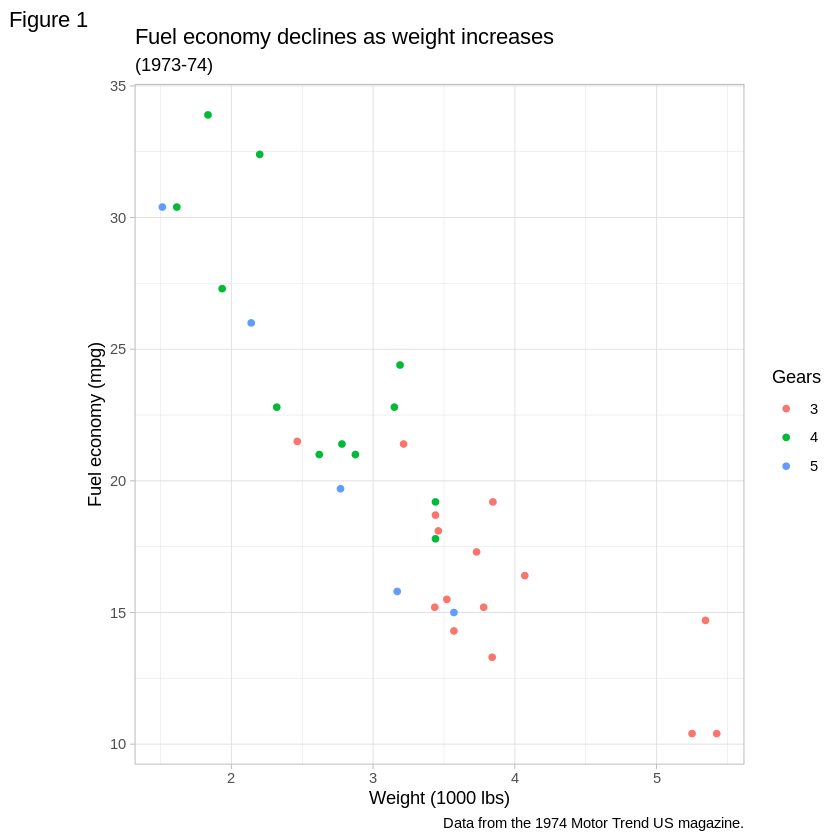

In [7]:
p1 + theme_light()

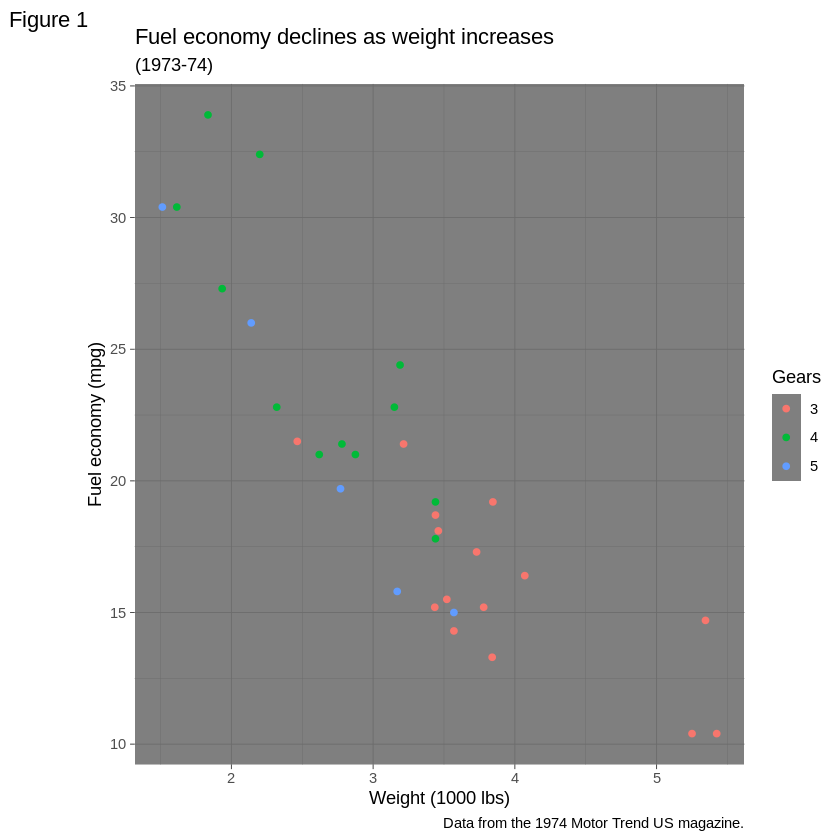

In [8]:
p1 + theme_dark()

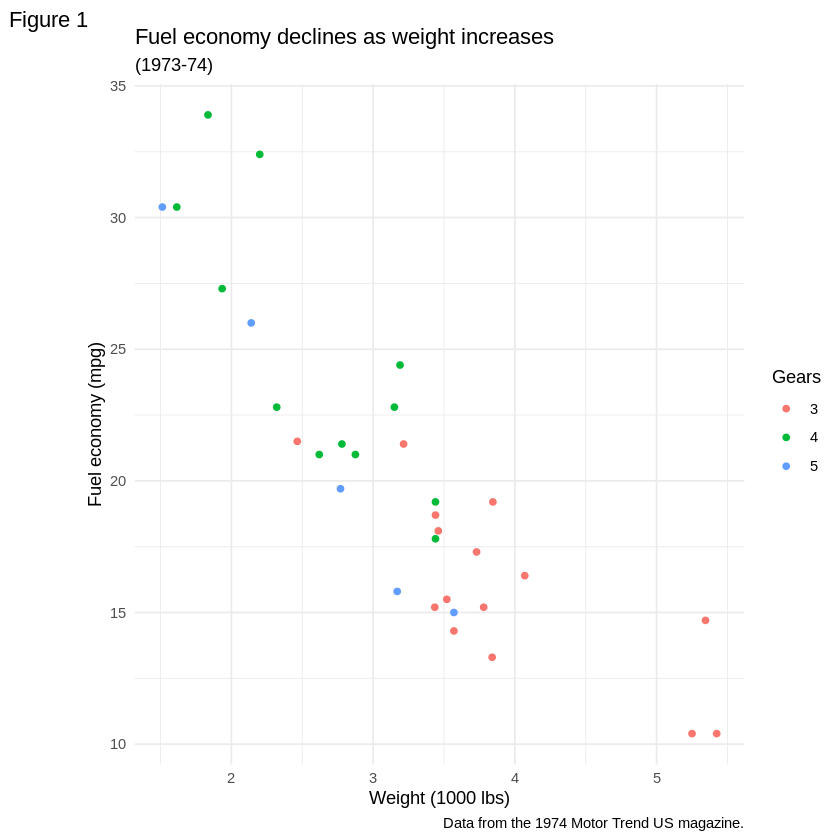

In [9]:
p1 + theme_minimal()

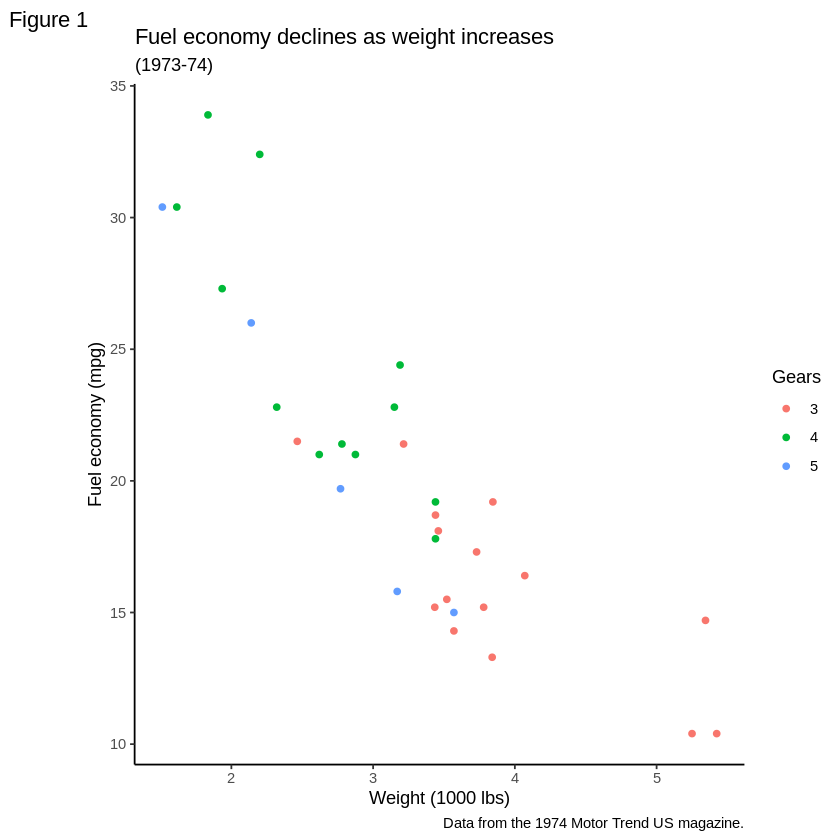

In [10]:
p1 + theme_classic()

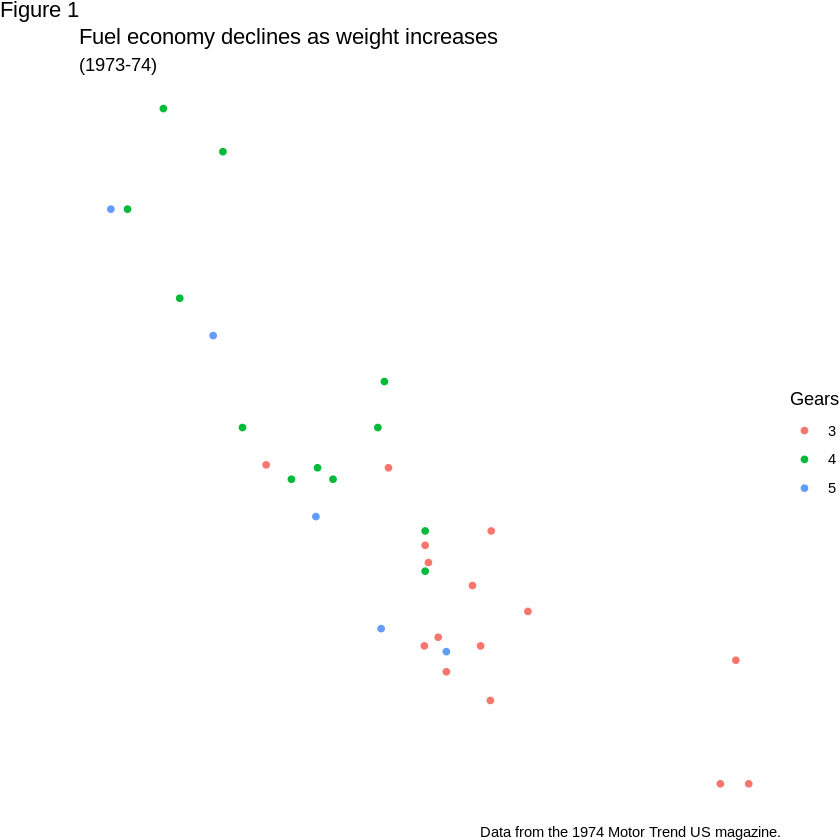

In [11]:
p1 + theme_void()

#Themes with panels

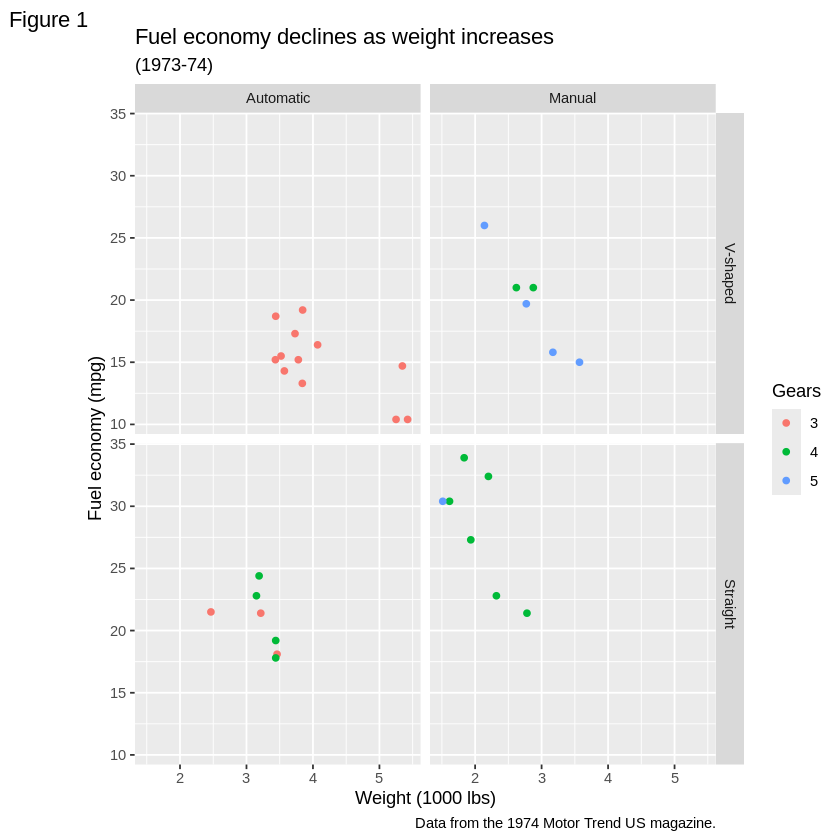

In [12]:
# Theme examples with panels
p2 <- p1 + facet_grid(vs ~ am)

p2 + theme_gray() # the default

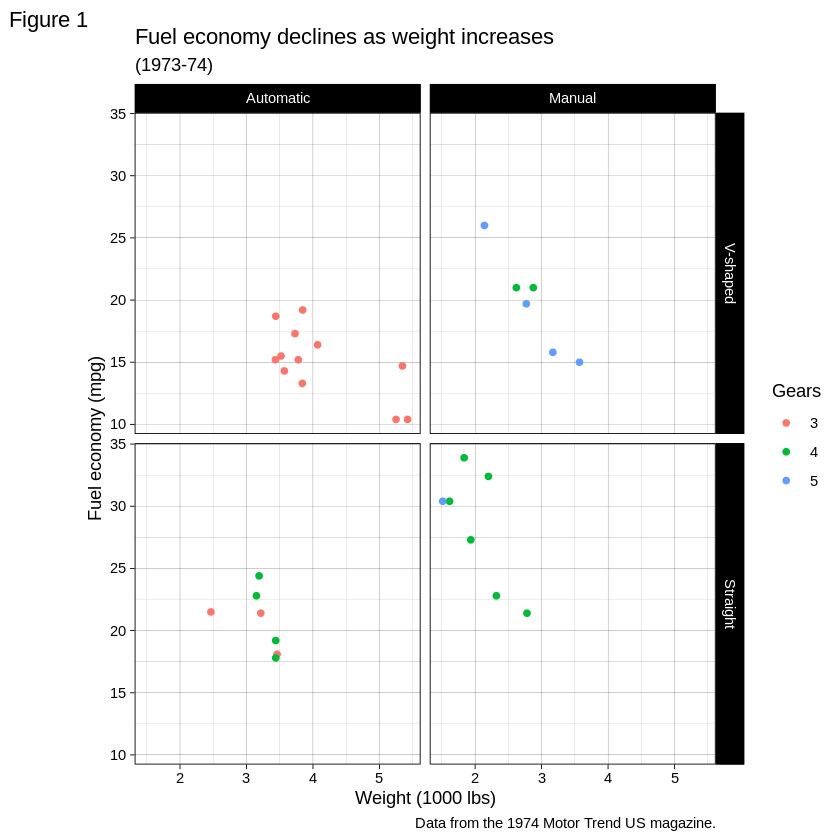

In [13]:
p2 + theme_linedraw()

#Complete ggplot themes

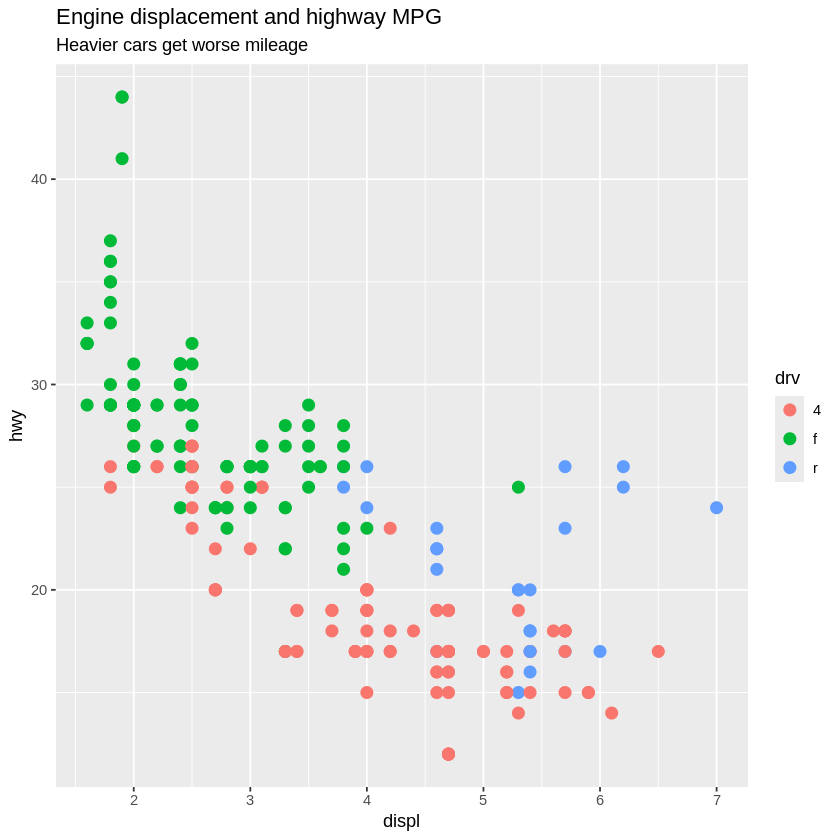

In [14]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage")

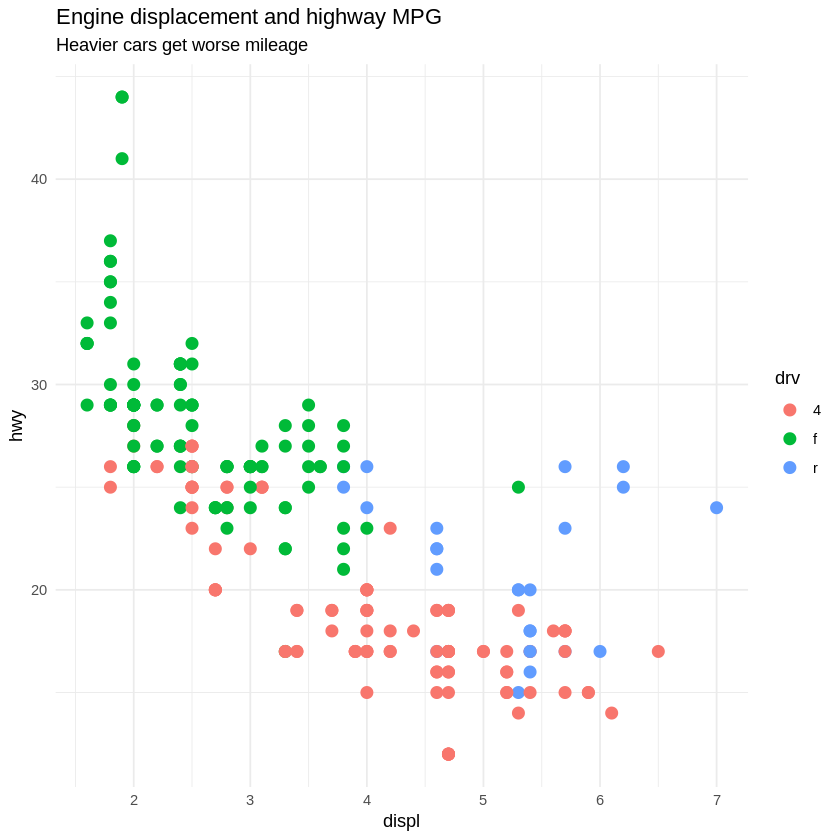

In [18]:
#How would I add `theme_minimal` to this plot?

ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal()

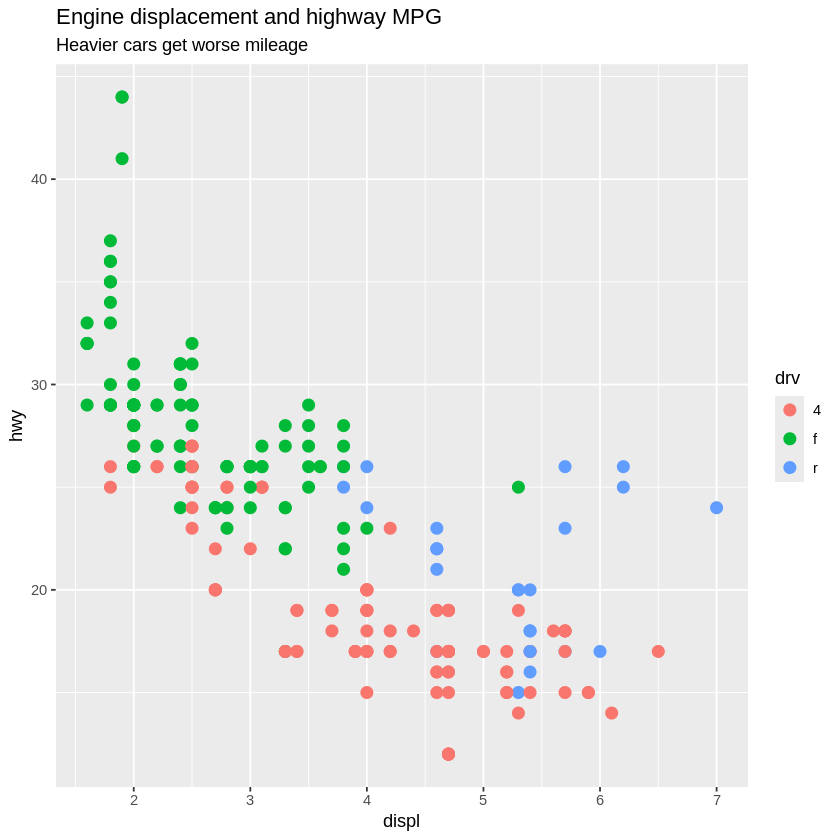

In [16]:
#How do I use `theme_minimal` with a base size of 16?

ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage",
       theme_minimal(base_size = 16)) #I added this line

#YOUR TURN
#Modifying plot elements with theme()

In [19]:
#to see help pages
?theme

Look at the documentation for [theme()](https://ggplot2.tidyverse.org/reference/theme.html) online.

Adjust this plot to make this plot's legend on the bottom

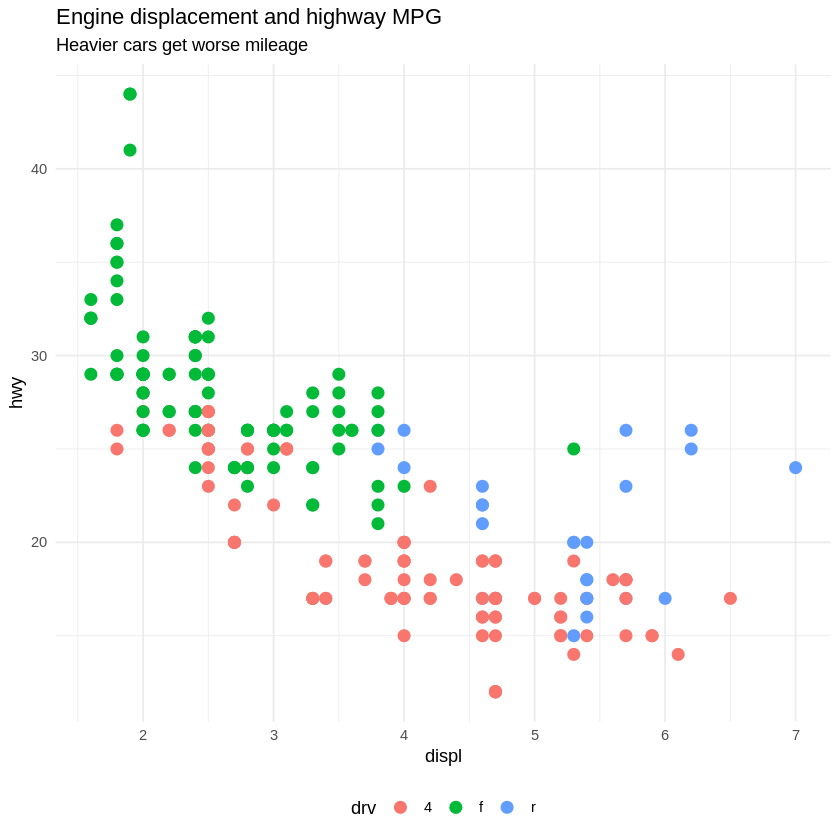

In [27]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal() +
  theme(legend.position = 'bottom')


Look at the documentation for [theme() online](https://ggplot2.tidyverse.org/reference/theme.html). Make the following changes to this plot:

    Disable the major panel grid for the x-axis
    Disable the minor panel grid for the x-axis
    Disable the minor panel grid for the y-axis.

You should only have three horizontal lines for the grid.


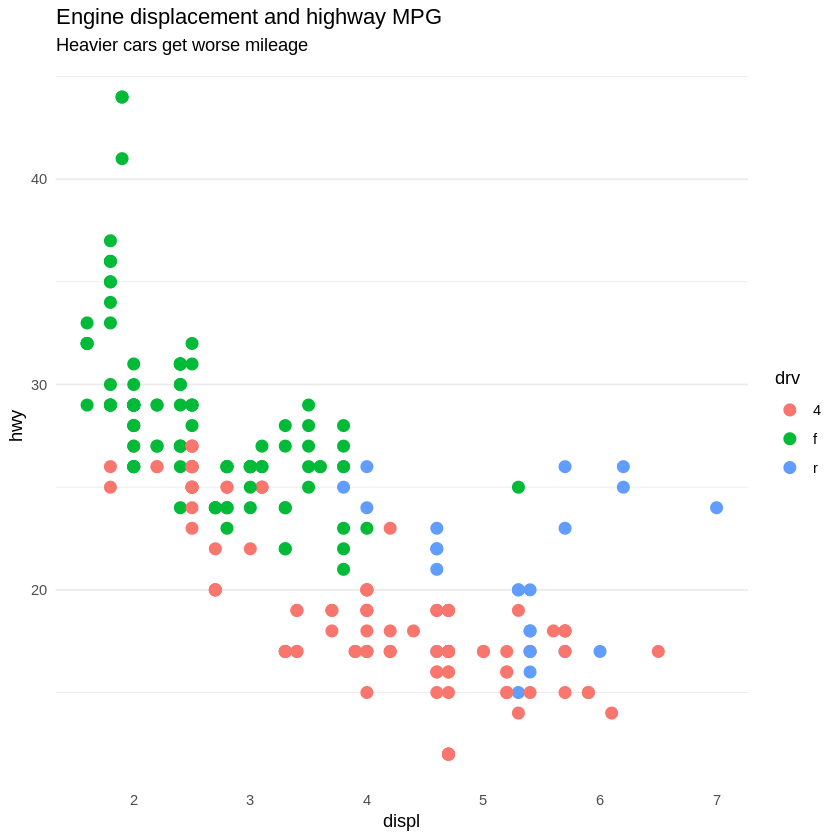

In [29]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal() +
  theme(panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank())

Almost every other plot element fits into one of three categories: a rectangle, a line, or text. Changing the settings on these elements requires specific functions that correspond to these categories.

# Borders and backgrounds with `element_rect()`

Look at the documentation for [element()](https://ggplot2.tidyverse.org/reference/element.html) and the documentation for [theme()](https://ggplot2.tidyverse.org/reference/theme.html) online. Make the following changes to this plot:

    Fill the plot background with #F2D8CE
    Fill the panel background with #608BA6, and make the border #184759 with linewidth = 5

This will be a fairly ugly plot.


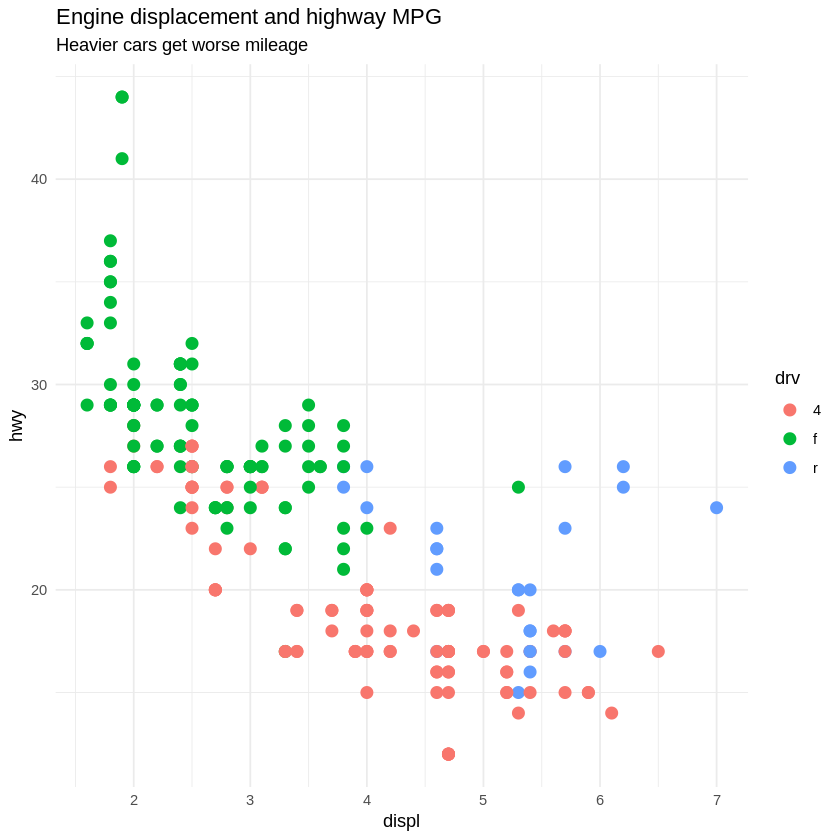

In [30]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal()

# Lines with element_line()

Let's make another ugly plot - Make the major panel gridlines blue and dashed with linewidth = 1

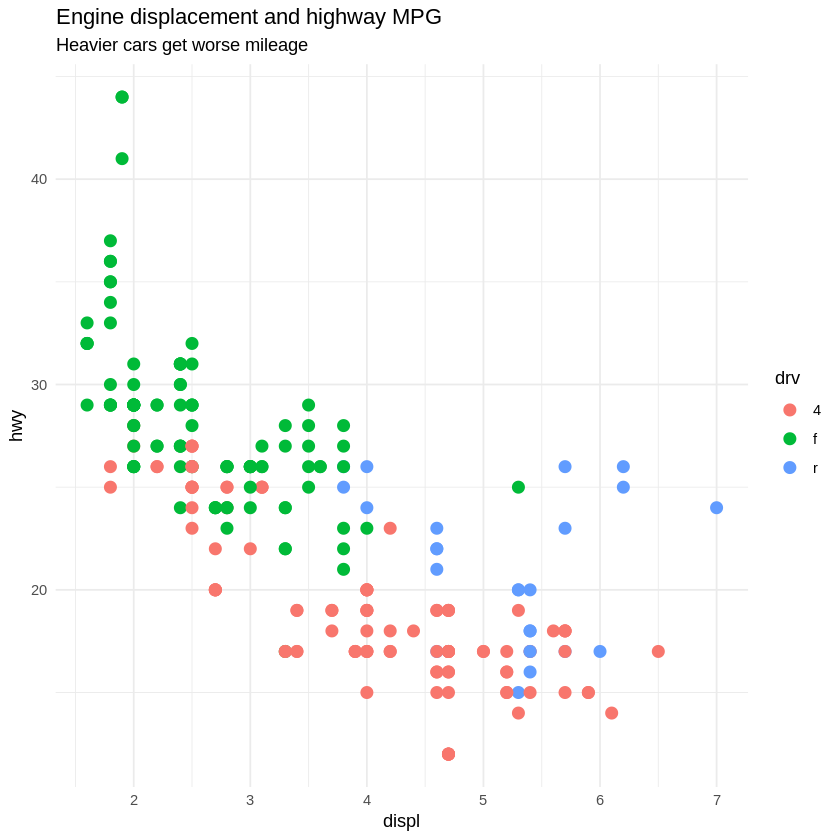

In [32]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal()

# Text with element_text()

Let's change the plot text

*   Make the y-axis text italic
*   Make the plot title right aligned, bold, and colored with #8C7811
*   Make the plot subtitle right aligned


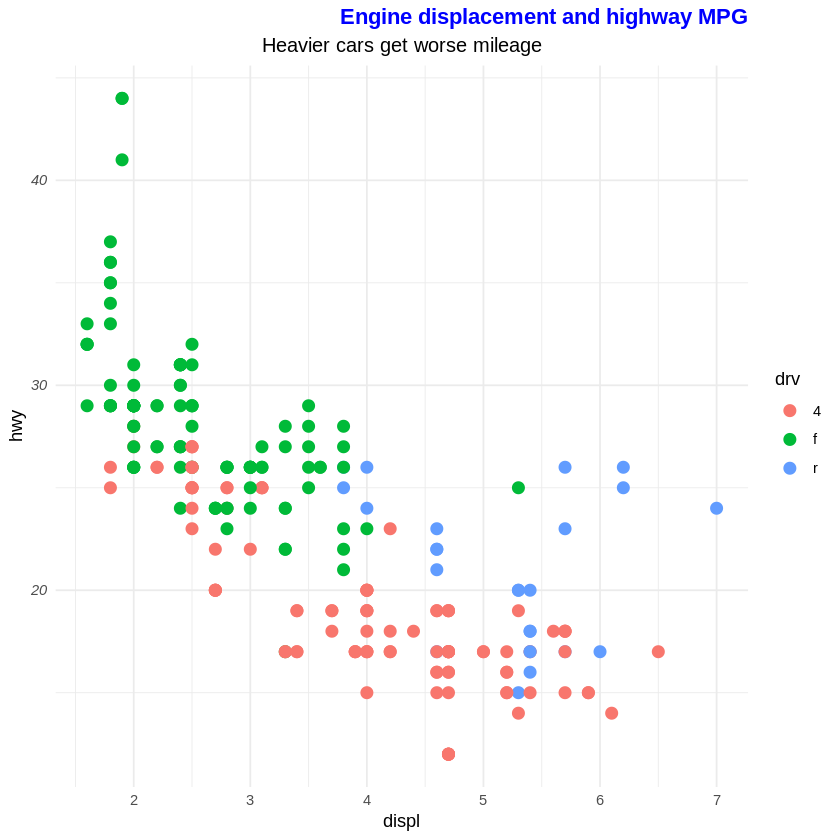

In [31]:
ggplot(data = mpg,
       mapping = aes(x = displ, y = hwy, color = drv)) +
  geom_point(size = 3) +
  labs(title = "Engine displacement and highway MPG",
       subtitle = "Heavier cars get worse mileage") +
  theme_minimal() +
  theme(axis.text.y = element_text(face = "italic"),
plot.title = element_text(hjust = 1, face = "bold", color = "blue"),
plot.subtitle = element_text(hjust = 0.5, size = 12))